#**EMAIL SPAM DETECTION WITH MACHINE LEARNING**

In [ ]:
# importing packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
df=pd.read_csv('spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.count()

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

In [ ]:
#checking for null values

df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.count()

v1    5572
v2    5572
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.rename(columns={'v1':'Reciever','v2':'Email'},inplace=True)
df.head()

,Reciever,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
E=LabelEncoder()

In [ ]:
df['Reciever']=E.fit_transform(df['Reciever'])

In [ ]:
df.head()

,Reciever,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Reciever', ylabel='count'>

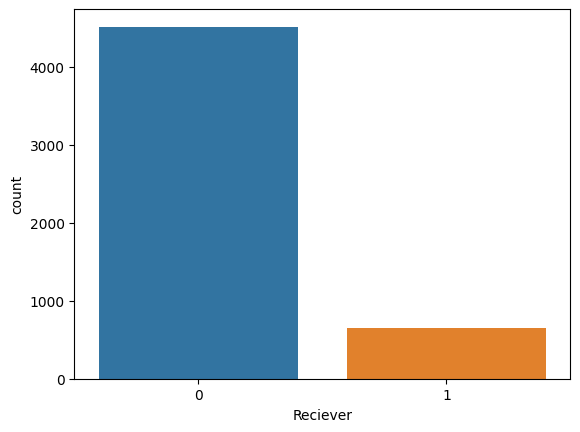

In [ ]:
sns.countplot(x=df["Reciever"])

<Axes: ylabel='Density'>

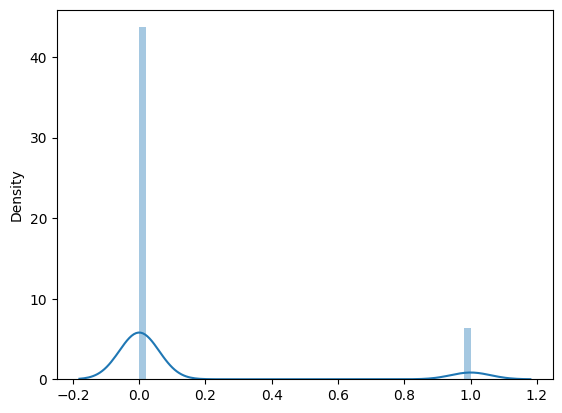

In [ ]:
sns.distplot(x=df["Reciever"])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
T=TfidfVectorizer(encoding='latin-1',stop_words='english',analyzer='word',lowercase=True,smooth_idf=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
x=df['Email']
y=df['Reciever']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [ ]:
f_train=T.fit_transform(x_train)
f_test=T.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(f_train,y_train)

LogisticRegression()

In [ ]:
y_pred=LR.predict(f_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, LR.predict(f_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1341
           1       0.98      0.61      0.75       210

    accuracy                           0.95      1551
   macro avg       0.96      0.81      0.86      1551
weighted avg       0.95      0.95      0.94      1551



In [ ]:
print("Confusion matrix of the model is:\n",confusion_matrix(y_test,y_pred))

Confusion matrix of the model is:
 [[1338    3]
 [  81  129]]


In [ ]:
print("Accuracy of the model is:\n",accuracy_score(y_test,y_pred)*100)

Accuracy of the model is:
 94.58413926499033


In [ ]:
#accuracy of the model is 94.58413926499033 which is very accurate 